In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(28*28, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.linear(x)
    
def train(model, train_loader, x_train, y_train, x_val, y_val, optimizer, err, num_epochs):
    count = 0
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):

            # start training
            optimizer.zero_grad()
            outputs = model(images)
            loss = err(outputs, labels)
            loss.backward()
            optimizer.step()
            # end training

            count += 1

            if count % 50 == 0:
                # On whole training set
                
                train_outputs = model(x_train) # training outputs
                train_loss = err(train_outputs, y_train)
                _, predicted = torch.max(train_outputs.data, 1)
                train_total = y_train.size(0)
                train_correct = (predicted == y_train).sum().item()
                train_accuracy = train_correct / train_total * 100
                train_accuracies.append(train_accuracy)
                train_losses.append(loss.item())
                
                # On whole validation set
                val_outputs = model(x_val)
                val_loss = err(val_outputs, y_val)
                _, predicted = torch.max(val_outputs.data, 1)
                val_total = y_val.size(0)
                val_correct = (predicted == y_val).sum().item()
                val_accuracy = val_correct / val_total * 100
                val_accuracies.append(val_accuracy)
                val_losses.append(val_loss.item())
                
                if count % 500 == 0:
                    print(f'Iteration: {count}. Train Loss: {loss.item()}. Train Accuracy: {train_accuracy}. Val Loss: {val_loss.item()}. Val Accuracy: {val_accuracy}')

    return train_losses, train_accuracies, val_losses, val_accuracies

## 1. Basic Logistic Regression

In [2]:
train_data = pd.read_csv('D:/github/pytorch/pytorch/digit_recogniser/dataset/train.csv') 
test_data = pd.read_csv('D:/github/pytorch/pytorch/digit_recogniser/dataset/test.csv')

# get trainng DataFrame
x_train_df = train_data.drop('label', axis=1)
y_train_df = train_data['label']

x_test_df = test_data

# Split Training DataFrame into training and validation data
x_train_df, x_val_df, y_train_df, y_val_df = train_test_split(x_train_df, y_train_df, test_size=0.2, random_state=42) # split training data into train and val data

# Convert DataFrame to numpy array
x_train_arr = x_train_df.values
y_train_arr = y_train_df.values

x_val_arr = x_val_df.values
y_val_arr = y_val_df.values

x_test_arr = x_test_df.values

# convert to tensor
x_train = torch.from_numpy(x_train_arr).float()
y_train = torch.from_numpy(y_train_arr).long()

x_val = torch.from_numpy(x_val_arr).float()
y_val = torch.from_numpy(y_val_arr).long()

x_test = torch.from_numpy(x_test_arr).float()

# normlalise data
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

# Reshape data
x_train = x_train.view(-1, 1, 28, 28)
x_val = x_val.view(-1, 1, 28, 28)
x_test = x_test.view(-1, 1, 28, 28)

# Define hyperparameters
batch_size = 64
n_iters = 10000
num_epochs = int(n_iters / (len(x_train) / batch_size))

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


model = LogisticRegressionModel()

loss_fn = nn.CrossEntropyLoss()
lr = 1e-3
optimizer = optim.SGD(model.parameters(), lr=lr)

train_loss, train_acc, val_loss, val_acc = train(model, train_loader, x_train, y_train, x_val, y_val, optimizer, loss_fn, num_epochs)

Iteration: 500. Train Loss: 1.8772298097610474. Train Accuracy: 67.77678571428571. Val Loss: 1.8618061542510986. Val Accuracy: 67.33333333333333
Iteration: 1000. Train Loss: 1.485127568244934. Train Accuracy: 76.07142857142857. Val Loss: 1.555152416229248. Val Accuracy: 75.96428571428572
Iteration: 1500. Train Loss: 1.3721190690994263. Train Accuracy: 78.52678571428572. Val Loss: 1.3424323797225952. Val Accuracy: 78.94047619047619
Iteration: 2000. Train Loss: 1.173683524131775. Train Accuracy: 80.05654761904762. Val Loss: 1.1922385692596436. Val Accuracy: 80.28571428571428
Iteration: 2500. Train Loss: 1.0485717058181763. Train Accuracy: 81.30059523809524. Val Loss: 1.0816000699996948. Val Accuracy: 81.42857142857143
Iteration: 3000. Train Loss: 1.0925449132919312. Train Accuracy: 82.06547619047619. Val Loss: 0.9977186918258667. Val Accuracy: 82.0
Iteration: 3500. Train Loss: 0.848637580871582. Train Accuracy: 82.63095238095238. Val Loss: 0.9316694736480713. Val Accuracy: 82.35714285714

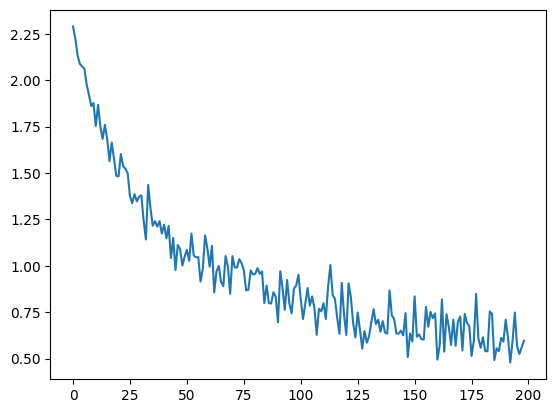

In [3]:
plt.plot(train_loss, label='Training Loss')

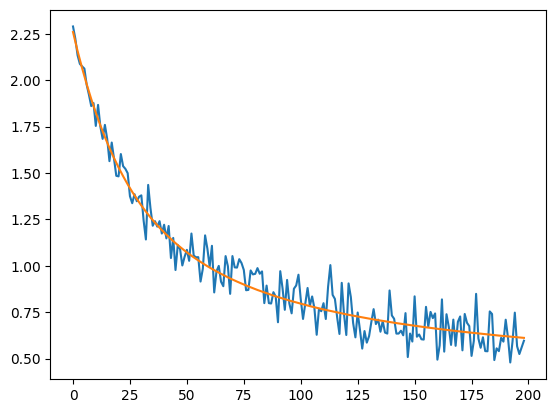

In [4]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.show()

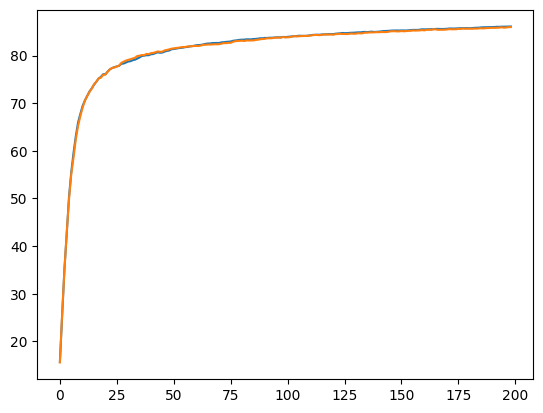

In [8]:
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.show()

Text(0.5, 1.0, 'Prediction: 2, Index: 21408')

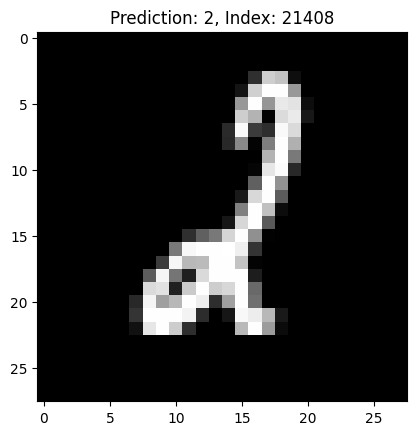

In [9]:
index = np.random.randint(0, x_test_arr.shape[0])
image = x_test_arr[index]
pred = torch.max(model(x_test[index]), 1)[1].item()
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Prediction: {pred}, Index: {index}')